# HR Analytics Prediction: Why do People Resign?

Source: https://www.kaggle.com/code/paramarthasengupta/hr-analytics-prediction-why-do-people-resign/notebook

## Import packages and file

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr

In [2]:
# Read file
df = pd.read_csv('employee_attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

 ## Data preparation

In [4]:
df.columns = [col.lower() for col in df.columns]
df = df.rename(columns={'businesstravel':'travel',
                        'distancefromhome':'distance_from_home',
                        'educationfield':'field', 
                        'employeecount':'employee_count',
                        'employeenumber': 'employee_number',
                        'environmentsatisfaction':'env_satisfaction',
                        'hourlyrate':'hourly_rate',
                        'jobinvolvement':'job_involvement',
                        'joblevel':'job_level',
                        'jobrole':'job_role',
                        'jobsatisfaction':'job_satisfaction',
                        'maritalstatus':'marital_status',
                        'monthlyincome':'monthly_income',
                        'monthlyrate':'monthly_rate',
                        'numcompaniesworked':'num_companies_worked',
                        'over18':'over_18',
                        'percentsalaryhike':'percent_salary_hike',
                        'performancerating':'performance_rating',
                        'relationshipsatisfaction':'relationship_satisfaction',
                        'standardhours':'standard_hours',
                        'stockoptionlevel':'stock_option_level',
                        'totalworkingyears':'working_years',
                        'trainingtimeslastyear':'training_last_year',
                        'worklifebalance':'work_life_balance',
                        'yearsatcompany': 'years_at_company',
                        'yearsincurrentrole' :'years_in_current_role',
                        'yearssincelastpromotion':'years_since_promotion',
                        'yearswithcurrmanager':'years_with_current_manager'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1470 non-null   int64 
 1   attrition                   1470 non-null   object
 2   travel                      1470 non-null   object
 3   dailyrate                   1470 non-null   int64 
 4   department                  1470 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   education                   1470 non-null   int64 
 7   field                       1470 non-null   object
 8   employee_count              1470 non-null   int64 
 9   employee_number             1470 non-null   int64 
 10  env_satisfaction            1470 non-null   int64 
 11  gender                      1470 non-null   object
 12  hourly_rate                 1470 non-null   int64 
 13  job_involvement             1470 non-null   int6

In [6]:
df.describe()

,age,dailyrate,distance_from_home,education,employee_count,employee_number,env_satisfaction,hourly_rate,job_involvement,job_level,...,relationship_satisfaction,standard_hours,stock_option_level,working_years,training_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_promotion,years_with_current_manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df['over_18'].describe()

# All employees are over 18, we can drop his column

df = df.drop('over_18', axis=1)


### Dataset info

* age: Minimum age is 18, mean of 37 and maximum of 60
* env_satisfaction: mean of 2.7 with a maximum of 4. (What was the scale?)
* standard_hours: All employees are working 80 hours 
* working_years: mean 11,2 working years, maximum of 40. 7.7 standard deviation, possible outiers increasing the mean
* years_at_company: mean of 7, but standard deviation of 6. 9 in 3rd percentile, 40 in the 4th. Outliers towards the end
* years_in_current_role: mean of 4 years in the current role, but 3.6 of stanradr deviation. The 2nd percentile is 3 years


## EDA

**1. Attrition Analysis**
- Age: Group employees by age and calculate the attrition rate. This will help you understand if certain age groups are more likely to leave.
- Department: Analyze attrition rates across different departments to identify which departments have higher turnover rates.
- Job Role: Investigate which job roles have the highest attrition rates to identify potentially problematic positions.
- Distance From Home: Assess if employees living further away from the office are more likely to leave.
- Job Satisfaction: Analyze how job satisfaction (from the JobSatisfaction column) correlates with attrition. Low satisfaction scores might be a predictor of attrition.
- Environment Satisfaction: Similarly, see if EnvironmentSatisfaction affects attrition rates.
- Monthly Income: Determine if there’s a relationship between an employee’s income and their likelihood to leave.
*Salary Hike vs. Attrition: Analyze whether employees who received higher salary hikes (PercentSalaryHike) are less likely to leave.*
- Work-Life Balance: Explore whether employees with poor work-life balance scores (WorkLifeBalance) are more likely to leave.
- OverTime: Investigate if employees working overtime (OverTime) are more prone to attrition, possibly due to burnout.
- Performance Rating: Analyze the relationship between performance ratings and attrition to see if high or low performers are more likely to leave.
- Gender and Attrition: Compare attrition rates between genders to see if there are any significant differences.


- Promotion History: See if the time since the last promotion (YearsSinceLastPromotion) affects the likelihood of an employee leaving.
- Years in Current Role vs. Attrition: Analyze if employees who have been in the same role for a long time are more likely to leave.
- Job Involvement vs. Attrition: Analyze if employees with lower job involvement scores are more likely to leave.

## 10. Comprehensive Predictive Modeling
Attrition Prediction: Use all relevant columns to build a predictive model (e.g., using logistic regression, decision trees, or machine learning algorithms) to predict which employees are most likely to leave. This model can help HR departments proactively address potential attrition.

## Attrition Analysis

*We currently lack information on the specific reasons for employee terminations and exits, so the recommendations provided may not apply to every situation. Conducting further research, such as exit interviews, could be beneficial in understanding the conditions and challenges the company faces in retaining talent.*

In [8]:
# How many employees have left the company?

df['attrition'].value_counts()

attrition
No     1233
Yes     237
Name: count, dtype: int64

In [9]:
# Total employees: 1470
# Employees in the company: 1233
# Employees who left: 237

In [10]:
#Employees who left

out = df[df['attrition'] == 'Yes']
out.head(5)

,age,attrition,travel,dailyrate,department,distance_from_home,education,field,employee_count,employee_number,...,relationship_satisfaction,standard_hours,stock_option_level,working_years,training_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_promotion,years_with_current_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


In [11]:
# Employees in the company

in_company = df[df['attrition'] == 'No']
in_company.head(5)

,age,attrition,travel,dailyrate,department,distance_from_home,education,field,employee_count,employee_number,...,relationship_satisfaction,standard_hours,stock_option_level,working_years,training_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_promotion,years_with_current_manager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


### Attrition by age

In [12]:
# Grouping employees' age
age_total = df.groupby('age').size().sort_values(ascending=False)
age_total

age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
dtype: int64

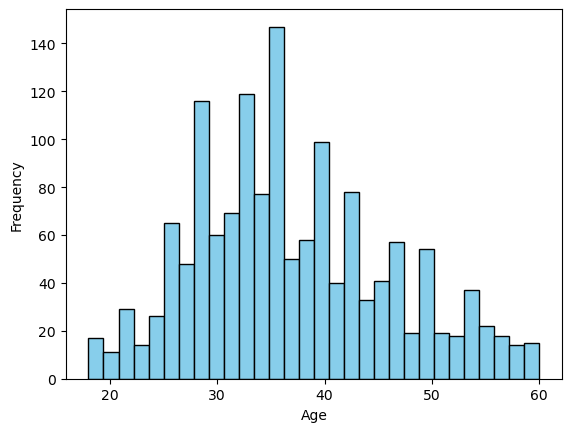

In [13]:
# All employees' age distribution

df['age'].plot(kind='hist', 
                    xlabel='Age', 
                    ylabel='Frequency', 
                    bins=30,
                    color='skyblue',
                    edgecolor='black'
                    );

In [14]:
# Grouping employees that left age
age_out = out.groupby('age').size().sort_values(ascending=False)
age_out

age
31    18
29    18
28    14
33    12
26    12
32    11
35    10
30     9
34     9
24     7
19     6
36     6
37     6
39     6
41     6
25     6
44     6
21     6
20     6
50     5
40     5
58     5
22     5
18     4
23     4
46     4
56     3
55     3
47     3
27     3
52     3
51     2
53     2
38     2
49     2
45     2
43     2
42     2
48     2
dtype: int64

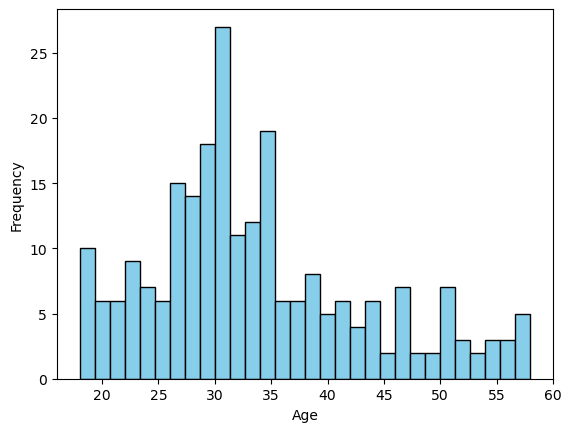

In [15]:
# Employees that left age distribution

out['age'].plot(kind='hist', 
                    xlabel='Age', 
                    ylabel='Frequency', 
                    bins=30,
                    color='skyblue',
                    edgecolor='black'
                    );

# 28-35 is the most frequent age ranges of employees who have left. 

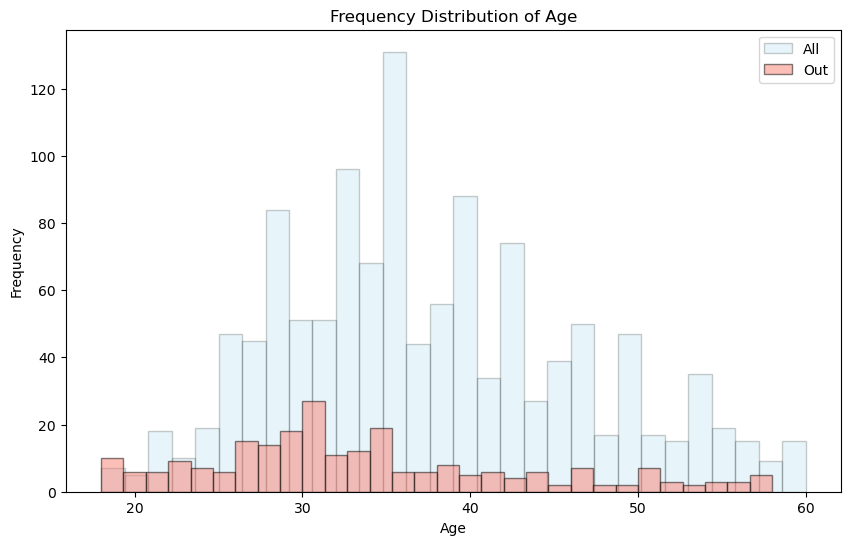

In [16]:
# Histogram
plt.figure(figsize=(10, 6))

# All employees
plt.hist(in_company['age'], bins=30, alpha=0.2, label='All', color='skyblue', edgecolor='black')

# Employees who left
plt.hist(out['age'], bins=30, alpha=0.5, label='Out', color='salmon', edgecolor='black')

plt.title('Frequency Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

In [17]:
# Similar age distribution beetween employees in the company and employees who left. 
# However, there is a higher peak in the employees who left in between 30-32 years old which is not oberved in the total population.

In [18]:
# Attrition rate by age
attrition_rate_age = (age_out/age_total) * 100

# Fill NA and sort
attrition_rate_age = attrition_rate_age.fillna(0).sort_values(ascending=False)
attrition_rate_age


age
19    66.666667
20    54.545455
18    50.000000
21    46.153846
58    35.714286
22    31.250000
26    30.769231
28    29.166667
23    28.571429
24    26.923077
29    26.470588
31    26.086957
25    23.076923
56    21.428571
33    20.689655
44    18.181818
32    18.032787
52    16.666667
50    16.666667
30    15.000000
41    15.000000
39    14.285714
55    13.636364
35    12.820513
47    12.500000
46    12.121212
37    12.000000
34    11.688312
51    10.526316
53    10.526316
48    10.526316
40     8.771930
36     8.695652
49     8.333333
43     6.250000
27     6.250000
45     4.878049
42     4.347826
38     3.448276
54     0.000000
57     0.000000
59     0.000000
60     0.000000
dtype: float64

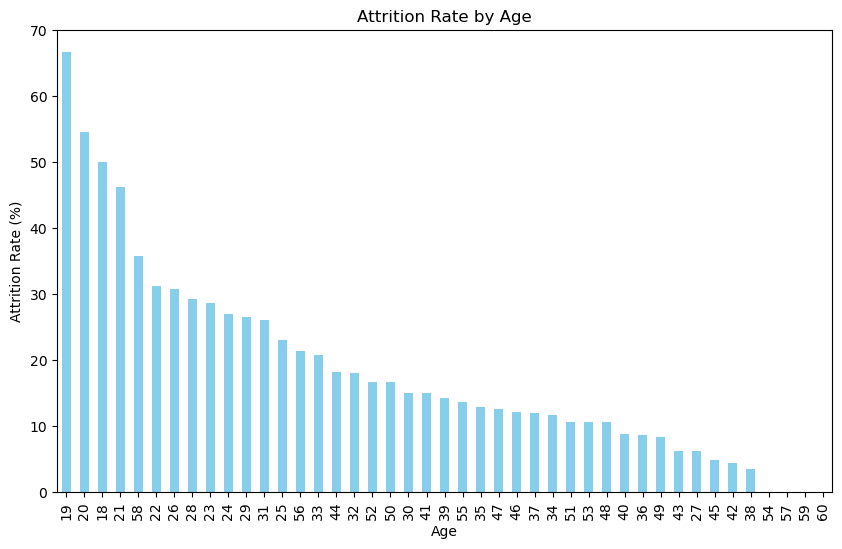

In [19]:
# Bar plot
attrition_rate_age.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Attrition Rate by Age')
plt.xlabel('Age')
plt.ylabel('Attrition Rate (%)')
plt.show()

**Analysis**

The most common age range among employees in the company is 28-35 years. This age group also has the highest number of employees who have left the company. However, when looking at the attrition rate specifically, **younger employees aged 19-21 are the most likely to leave**, followed by employees who are 58 years old.

**Possible recommendiations:**

For junior employees, a high attrition rate  might be due to lack of career development opportunities. To help retain this group, the company might want to consider looking into mentorship programs, offer clear career paths and providing engaging training opportunities.

For senior employees, the higher attrition rate might indicate early retirements or dissatsifaction. Flexible retirmenet plans could be considered, as well as offeirng part-time roles or leveraging their expertise in mentorship programs.


### Attrition by department

In [20]:
# What departments are there in the company and how many employees in each? 

dep_total = df.groupby('department').size().sort_values(ascending=False)
dep_total

department
Research & Development    961
Sales                     446
Human Resources            63
dtype: int64

In [21]:
# Department and employees that left
dep_out = out.groupby('department').size().sort_values(ascending=False)
dep_out

department
Research & Development    133
Sales                      92
Human Resources            12
dtype: int64

In [22]:
# Attrition rate by department
attrition_rate_dep = (dep_out / dep_total)*100

# Fill NA and sort
attrition_rate_dep = attrition_rate_dep.fillna(0).sort_values(ascending=False)
attrition_rate_dep

department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
dtype: float64

**Analysis**

Research and Development is the department with the highest number of employees, followed by Sales and Human Resources. As expected, R&D also has the highest number of employees who have left. However, when looking at the attrition rate, **employees in Sales and Human Resources are more likely to leave**, with attrition rates of 20.6% and 19%, respectively, compared to 13.8% in R&D.

It may be worthwhile to investigate the conditions, career development opportunities, and other factors that might be impacting these departments differently.

### Attrition by job role

In [23]:
# What roles exist at the company and how many employees in each? 

role_total = df.groupby('job_role').size().sort_values(ascending=False)
role_total

job_role
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
dtype: int64

In [24]:
# What roles did employees who have left have?

role_out = out.groupby('job_role').size().sort_values(ascending=False)
role_out

job_role
Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
dtype: int64

In [25]:
# Attrition rate by job role
attrition_rate_role = (role_out / role_total)*100

# Fill NA and sort
attrition_rate_role = attrition_rate_role.fillna(0).sort_values(ascending=False)
attrition_rate_role

job_role
Sales Representative         39.759036
Laboratory Technician        23.938224
Human Resources              23.076923
Sales Executive              17.484663
Research Scientist           16.095890
Manufacturing Director        6.896552
Healthcare Representative     6.870229
Manager                       4.901961
Research Director             2.500000
dtype: float64

**Analysis**

Sales Representatives have the highest attrition rate at 39.8%, and Sales Executives follow with a rate of 17.5%. As observed before, the Sales department also has one of the highest attrition rates overall (20.6%). **This suggests that roles within Sales are particularly susceptible to high turnover.**

The Human Resources role has a notable attrition rate of 23.1%.

Despite having the largest number of employees, R&D has a lower attrition rate (13.8%) compared to Sales and HR. However, the moderate turnover in specific roles like Laboratory Technicians indicates potential dissatisfaction or a lack of advancement opportunities within this position.

In [26]:
# What roles are there in each deparment?

roles_per_department = df.groupby('department')['job_role'].unique()
roles_per_department

department
Human Resources                                  [Human Resources, Manager]
Research & Development    [Research Scientist, Laboratory Technician, Ma...
Sales                      [Sales Executive, Manager, Sales Representative]
Name: job_role, dtype: object

In [27]:
# Roles in R&D department
df_rd = df[df['department'] == 'Research & Development']
roles_rd = df_rd['job_role'].unique()
roles_rd

array(['Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative',
       'Research Director', 'Manager'], dtype=object)

### Attrition by distance from home

In [28]:
# Distance from home data
df['distance_from_home'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: distance_from_home, dtype: float64

In [29]:
distance_total = df.groupby('distance_from_home').size().sort_values(ascending=False)
distance_total
distance_total.head(5)

distance_from_home
2     211
1     208
10     86
9      85
3      84
dtype: int64

In [30]:
distance_out = out.groupby('distance_from_home').size().sort_values(ascending=False)
distance_out.head(5)

distance_from_home
2     28
1     26
9     18
3     14
24    12
dtype: int64

In [31]:
# Attrition rate by distance from home
attrition_rate_distance = (distance_out / distance_total)*100

# Fill NA and sort
attrition_rate_distance = attrition_rate_distance.fillna(0).sort_values(ascending=False)
attrition_rate_distance.head(5)

distance_from_home
24    42.857143
13    31.578947
22    31.578947
12    30.000000
27    25.000000
dtype: float64

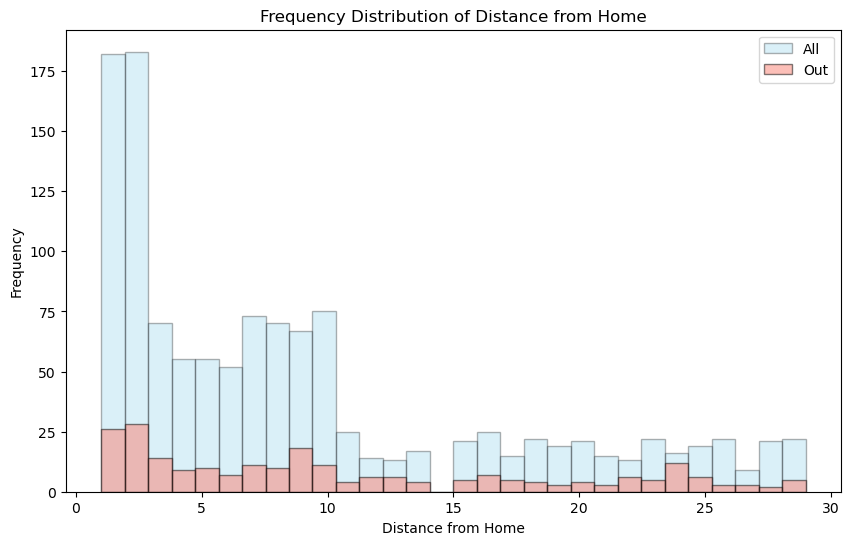

In [32]:
# Plot histogram
plt.figure(figsize=(10, 6))

# All employees
plt.hist(in_company['distance_from_home'], bins=30, alpha=0.3, label='All', color='skyblue', edgecolor='black')

# Employees who left
plt.hist(out['distance_from_home'], bins=30, alpha=0.5, label='Out', color='salmon', edgecolor='black')

# Adding titles and labels
plt.title('Frequency Distribution of Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

/var/folders/4n/v650pxtn7pl7c5rczqqv7nhc0000gn/T/ipykernel_11072/2053369135.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attrition', y='distance_from_home', data=df, palette='pastel' ,width=0.5)


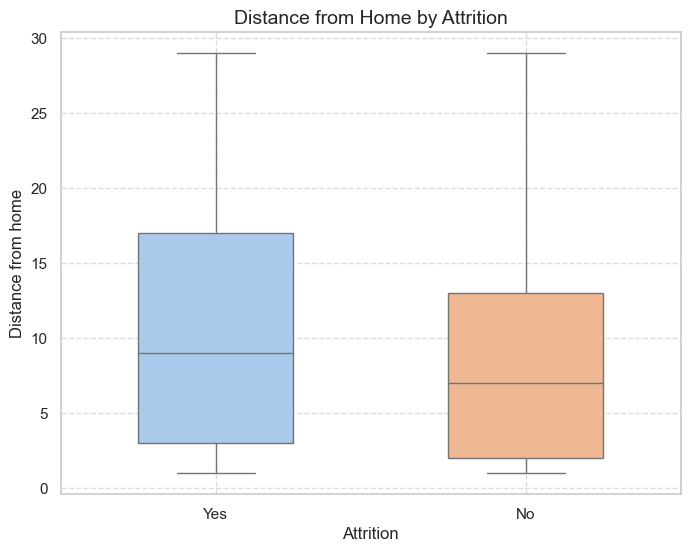

In [33]:
# Boxplot
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.boxplot(x='attrition', y='distance_from_home', data=df, palette='pastel' ,width=0.5)
plt.title('Distance from Home by Attrition', fontsize=14)
plt.xlabel('Attrition' ,fontsize=12)
plt.ylabel('Distance from home', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Analysis**

The analysis of attrition rates reveals that employees with moderate to long commutes are more likely to leave the company. This trend is also evident in the boxplot, which shows a greater range of distances for employees who have left compared to those who remain and a slightly higher mean distance. 

**Possible recommendations**

Employees who live at longer distances might be experiencing factors that increase their likelihood of leaving the company, such as cummiting fatigue and poorer work-life balance. **Flexible working policies and support programs** should be considered in orde to reduce the impact of commuting on employee saisfaction and retention and aim to imporve employees' work-life balance.

### Attrition by job, environment and reltionship satisfaction 

Assuming that the scale is 1 to 4 being 4 the highest rating

In [34]:
# Job satisfaction - All employees
job_sat = df['job_satisfaction'].value_counts()
job_sat

job_satisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [35]:
# Job satisfaction - Employees who left
job_sat_out = out['job_satisfaction'].value_counts()
job_sat_out

job_satisfaction
3    73
1    66
4    52
2    46
Name: count, dtype: int64

In [36]:
# Attrition rate by job satisfaction
attrition_rate_job_sat = (job_sat_out / job_sat)*100
attrition_rate_job_sat

job_satisfaction
1    22.837370
2    16.428571
3    16.515837
4    11.328976
Name: count, dtype: float64

**Analysis**

Job satisfaction ratings of 3 and 4 are the most common among all employees. However, for those who have left the company, the most frequent ratings are 3 and 1, respectively. This indicates that a notable portion of departing employees had a moderate satisfaction (rating 3). Despite this, the attrition rate analysis shows that employees with lower job satisfaction are more likely to leave. This suggests that while not all departing employees are highly dissatisfied, lower job satisfaction generally increases the likelihood of leaving the company.

In [37]:
# Environment satisfaction - All employees
env_sat = df['env_satisfaction'].value_counts()
env_sat

env_satisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [38]:
# Environment satisfaction - Employees who left
env_sat_out = out['env_satisfaction'].value_counts()
env_sat_out

env_satisfaction
1    72
3    62
4    60
2    43
Name: count, dtype: int64

In [39]:
# Attrition rate by environment satisfaction
attrition_rate_env_sat = (env_sat_out / env_sat)*100
attrition_rate_env_sat

env_satisfaction
1    25.352113
2    14.982578
3    13.686534
4    13.452915
Name: count, dtype: float64

**Analysis**

The data reveals that employees with the lowest environmental satisfaction rating (1) have the highest likelihood of leaving the company, indicating that poor environmental satisfaction is a significant predictor of higher attrition rates. 

However, it's also important to note that out of the 237 employees who left, 122 had high environmental satisfaction ratings (3 and 4). This suggests that while low satisfaction strongly correlates with higher attrition, a substantial number of departing employees rated their work environment positively.This suggests that while environmental satisfaction is an important factor in employee turnover, it is not the sole determinant. Other factors may also play a critical role in influencing whether employees decide to leave.

In [40]:
#Relationship satisfaciton
rel_sat = df['relationship_satisfaction'].value_counts()
rel_sat

relationship_satisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [41]:
rel_sat_out = out['relationship_satisfaction'].value_counts()
rel_sat_out

relationship_satisfaction
3    71
4    64
1    57
2    45
Name: count, dtype: int64

In [42]:
# Attrition rate by relationship satisfaction
attrition_rate_rel_sat = (rel_sat_out / rel_sat)*100
attrition_rate_rel_sat

relationship_satisfaction
1    20.652174
2    14.851485
3    15.468410
4    14.814815
Name: count, dtype: float64

**Analysis**

Employees with the lowest relationship satisfaction (rating 1) have the highest likelihood of leaving the company. This suggests that poor workplace relationships are a strong driver of employee turnover.However, a significant number of employees who left the company had higher satisfaction ratings (3 and 4). While these employees generally had a more positive view of their workplace relationships, it was not enough to prevent them from leaving.

### Roles and satisfaction

On a scale of 1 to 4

### Salary



In [43]:
# statistical info about monthly incomes

df['monthly_income'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: monthly_income, dtype: float64

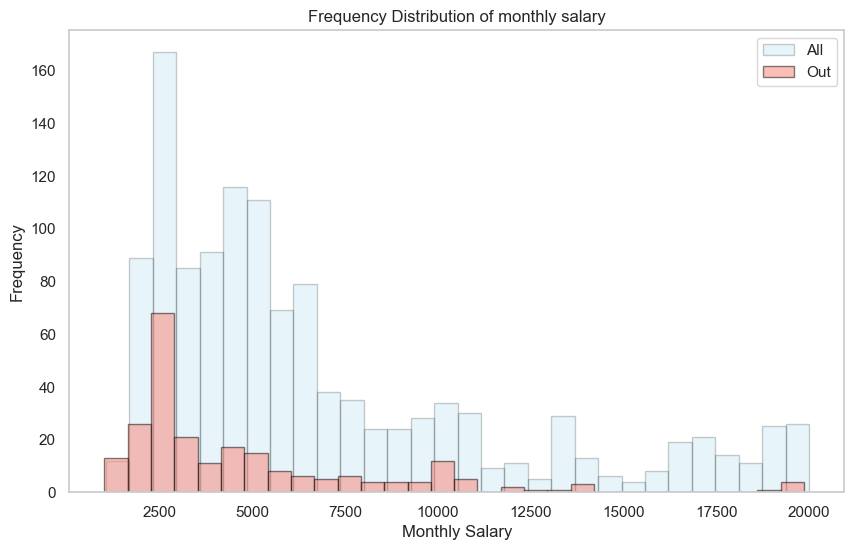

In [44]:
# Comparison histogram of monthly salary
plt.figure(figsize=(10, 6))

# All employees
plt.hist(in_company['monthly_income'], bins=30, alpha=0.2, label='All', color='skyblue', edgecolor='black')

# Employees who left
plt.hist(out['monthly_income'], bins=30, alpha=0.5, label='Out', color='salmon', edgecolor='black')

plt.title('Frequency Distribution of monthly salary')
plt.xlabel('Monthly Salary')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

We obersve a similar monthly income data distribution between all employees and employees who left

In [45]:
# Mean of monthly income of employees who left and employees who stayed

df.groupby('attrition')['monthly_income'].mean()

attrition
No     6832.739659
Yes    4787.092827
Name: monthly_income, dtype: float64

Only with the monthly income mean of each group (employees who stayed and employees who left the company) we observe a considerable difference, being the mean monhtly income of employees who left moderately lower than the mean income of those who stayed. 

/var/folders/4n/v650pxtn7pl7c5rczqqv7nhc0000gn/T/ipykernel_11072/3926614223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attrition', y='monthly_income', data=df, palette='pastel' ,width=0.5)


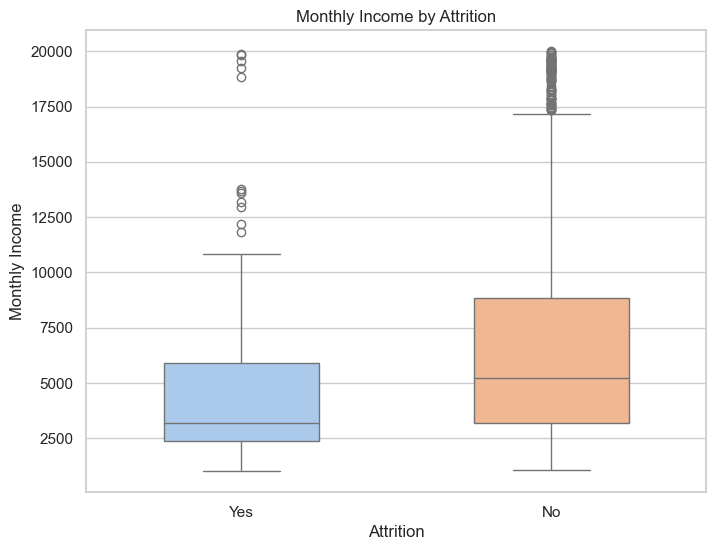

In [46]:
#Boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(x='attrition', y='monthly_income', data=df, palette='pastel' ,width=0.5)

plt.title('Monthly Income by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

The boxplot reveals that employees who left the company have a lower and narrower range of monthly incomes compared to those who stayed. Additionally, the mean monthly income for employees who left is also lower.

In [47]:
# Job roles grouped by mean monthly incomes

income_roles = df.groupby('job_role')['monthly_income'].mean().sort_values()
income_roles

job_role
Sales Representative          2626.000000
Laboratory Technician         3237.169884
Research Scientist            3239.972603
Human Resources               4235.750000
Sales Executive               6924.279141
Manufacturing Director        7295.137931
Healthcare Representative     7528.763359
Research Director            16033.550000
Manager                      17181.676471
Name: monthly_income, dtype: float64

In [48]:
# Attrition rate by job role (from previous job roles analysis)
attrition_rate_role = (role_out / role_total)*100

# Fill NA and sort
attrition_rate_role = attrition_rate_role.fillna(0).sort_values(ascending=False)
attrition_rate_role

job_role
Sales Representative         39.759036
Laboratory Technician        23.938224
Human Resources              23.076923
Sales Executive              17.484663
Research Scientist           16.095890
Manufacturing Director        6.896552
Healthcare Representative     6.870229
Manager                       4.901961
Research Director             2.500000
dtype: float64

**Analysis**

**Job roles and monthly salary**

The job roles with lower mean salaries are the same job roles that experience higher attrition rates.

### Work-life balance

In [49]:
# Work-life balance - All employees
balance = df['work_life_balance'].value_counts()
balance

work_life_balance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [50]:
# Work-life balance - Employees who left

balance_out = out['work_life_balance'].value_counts()
balance_out

work_life_balance
3    127
2     58
4     27
1     25
Name: count, dtype: int64

In [51]:
# Attrition rate by work-life balance
attrition_rate_balance = (balance_out / balance)*100
attrition_rate_balance.sort_values()

work_life_balance
3    14.221725
2    16.860465
4    17.647059
1    31.250000
Name: count, dtype: float64

**Analysis**

The majority of employees rate their work-life balance as 3, indicating a moderate level of satisfaction. Fewer employees rate it as 4 (very satisfied), and even fewer rate it as 1 (very dissatisfied).

Among employees who left the company, the most common ratings are 3 and 2, similar to the overall distribution.

The attrition rate is highest for employees with the lowest work-life balance rating (1) at 31.25%. This indicates that employees who rate their work-life balance poorly are significantly more likely to leave the company. 

### Overtime

In [52]:
# How many employees in total are doing overtime?

overtime_total = df.groupby('overtime').size().sort_values(ascending=False)
overtime_total

overtime
No     1054
Yes     416
dtype: int64

In [53]:
# Percentage of employees who have done overtime
total_employees = len(df)

# Number of employees who have done overtime
overtime_employees = df['overtime'].value_counts()['Yes']

# Percentage of employees who have done overtime
overtime_percentage = (overtime_employees / total_employees) * 100

# Result
print(f"Percentage of employees who have done overtime: {overtime_percentage:.2f}%")

Percentage of employees who have done overtime: 28.30%


In [54]:
# Employees who left who did overtime

overtime_out = out.groupby('overtime').size().sort_values(ascending=False)
overtime_out

overtime
Yes    127
No     110
dtype: int64

In [55]:
# Attrition rate by overtime
attrition_rate_overtime = (overtime_out / overtime_total)*100
attrition_rate_overtime

overtime
No     10.436433
Yes    30.528846
dtype: float64

Employees who have done overtime are more likely to leave the company than those who haven't done overtime

In [56]:
# Count the number of employees who have done overtime and those who haven't
overtime_counts = df['overtime'].value_counts()

# Calculate the attrition rate for each group
attrition_overtime = df.groupby('overtime')['attrition'].value_counts(normalize=True) * 100

print(overtime_counts)
print(attrition_overtime)

overtime
No     1054
Yes     416
Name: count, dtype: int64
overtime  attrition
No        No           89.563567
          Yes          10.436433
Yes       No           69.471154
          Yes          30.528846
Name: proportion, dtype: float64


**Analysis**

Employees who work overtime have a significantly higher attrition rate (30.5%) compared to those who don't. Working overtime might be a substantial factor contributing to employees leaving the company.

### Performance

In [57]:
# Performance - All employees
performance_total = df['performance_rating'].value_counts()
performance_total

performance_rating
3    1244
4     226
Name: count, dtype: int64

The majority of employees have a performance rating of 3, making it not meaningful to analyze.

### Gender

In [58]:
# Gender - All employees
gender_total = df['gender'].value_counts()
gender_total

gender
Male      882
Female    588
Name: count, dtype: int64

In [59]:
# Gender - Employees who left
gender_out = out['gender'].value_counts()
gender_out

gender
Male      150
Female     87
Name: count, dtype: int64

In [60]:
# Attrition rate by environment satisfaction
attrition_gender = (gender_out / gender_total)*100
attrition_gender

gender
Male      17.006803
Female    14.795918
Name: count, dtype: float64

Males employees are more likely to leave but the percentage of male employees is higher

### Promotions

In [61]:
df.columns

Index(['age', 'attrition', 'travel', 'dailyrate', 'department',
       'distance_from_home', 'education', 'field', 'employee_count',
       'employee_number', 'env_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'overtime', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'working_years', 'training_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_promotion', 'years_with_current_manager'],
      dtype='object')

In [62]:
# Years at company - All employees
years_company_total = df['years_at_company'].value_counts()
years_company_total.sort_values

<bound method Series.sort_values of years_at_company
5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: count, dtype: int64>

In [63]:
# Years at company - Employees who left
years_company_out = out['years_at_company'].value_counts()
years_company_out.sort_values

<bound method Series.sort_values of years_at_company
1     59
2     27
5     21
3     20
4     19
10    18
0     16
7     11
8      9
6      9
9      8
14     2
11     2
13     2
18     1
15     1
33     1
19     1
24     1
21     1
31     1
20     1
17     1
32     1
16     1
40     1
22     1
23     1
Name: count, dtype: int64>

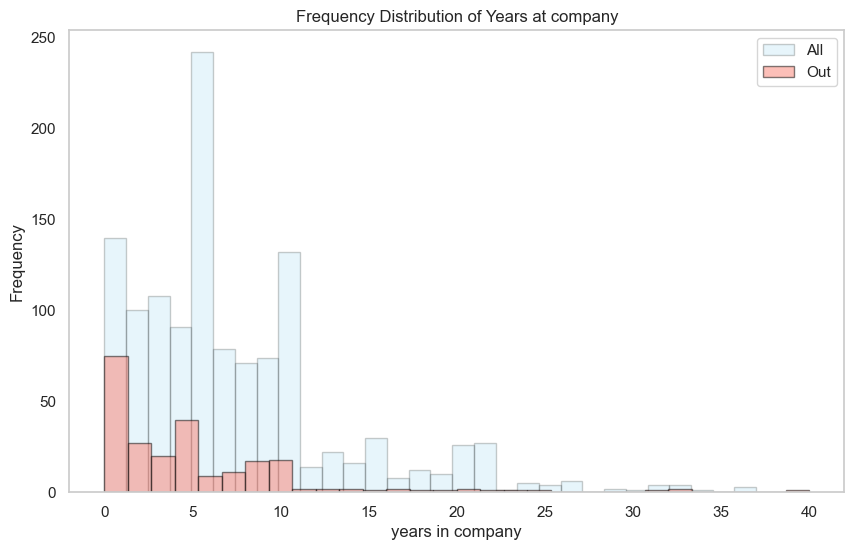

In [64]:
# Histogram
plt.figure(figsize=(10, 6))

# All employees
plt.hist(in_company['years_at_company'], bins=30, alpha=0.2, label='All', color='skyblue', edgecolor='black')

# Employees who left
plt.hist(out['years_at_company'], bins=30, alpha=0.5, label='Out', color='salmon', edgecolor='black')

plt.title('Frequency Distribution of Years at company')
plt.xlabel('years in company')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

### Job involvement

In [65]:
# Job involvement - All employees
job_inv = df['job_involvement'].value_counts()
job_inv

job_involvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [66]:
# Job involvement - Employees who left
job_inv_out = out['job_involvement'].value_counts()
job_inv_out

job_involvement
3    125
2     71
1     28
4     13
Name: count, dtype: int64

In [67]:
# Attrition rate by job involvement
attrition_rate_inv = (job_inv_out / job_inv)*100
attrition_rate_inv

job_involvement
1    33.734940
2    18.933333
3    14.400922
4     9.027778
Name: count, dtype: float64

**Analysis**

As expected, those who feel less involved with their jobs (ratings 1 and 2) are more likely to leave the company. 